# Таликов А.Ю.
# 18-ИВТ-3
# Вариант 1

In [1]:
import re
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
pass_data = pd.read_csv('titanic.csv')

In [10]:
pass_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### 1)Определите количество мужчин и женщин, которые ехали на корабле.

In [2]:
print("Количество мужчин:",len(pass_data.loc[pass_data.Sex =='male']))

Количество мужчин: 577


In [3]:
print("Количество женщин:",len(pass_data.loc[pass_data.Sex =='female']))

Количество женщин: 314


##### 2)Определите какой части пассажиров удалось выжить. 

In [4]:
A = pass_data[(pass_data['Survived'] == True)].shape[0]
B = pass_data.shape[0]
A/B

0.3838383838383838

#### 3)Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [5]:
A = pass_data[(pass_data['Pclass'] == 1)].shape[0]
B = pass_data.shape[0]
A/B

0.24242424242424243

#### 4)Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [6]:
print("Средний возраст=",pass_data['Age'].mean())
print("Медиана возрастов",pass_data['Age'].median())

Средний возраст= 29.69911764705882
Медиана возрастов 28.0


#### 5)Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [7]:
print(pass_data[['SibSp','Parch']].corr())

          SibSp     Parch
SibSp  1.000000  0.414838
Parch  0.414838  1.000000


Вывод: Корриляция между SibSp и Parch положительная cлабая. 

Плотность распределения признаков SibSp и Parch:


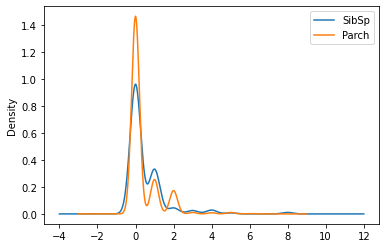

In [8]:
print("Плотность распределения признаков SibSp и Parch:")
pass_data[['SibSp','Parch']].plot.kde()

#### 6)Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [5]:
def cleaner(q):
    s = re.search(",[^\n]*(Miss|Mrs|Ms)\.\W*(?:(?=[^\n(]*\()[^\n(]*\(\W*|)(\w+)", q)
    if s:
        q = s.group(2)
    return q
pass_data = pd.read_csv('titanic.csv',index_col = 'PassengerId')
pass_data['Pclass'] = pass_data['Pclass'].astype(object)
s = pass_data[pass_data['Sex'] == 'female']['Name'].map(cleaner)
print(s.value_counts())

Mary         15
Anna         15
Elizabeth    11
Margaret     10
Alice         6
             ..
Torborg       1
Eugenie       1
Georgette     1
Fatima        1
Lilian        1
Name: Name, Length: 180, dtype: int64


Вывод: Чаще всего встречается имя Mary и Anna.

#### 7)Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [6]:
print(pass_data[['Survived','Pclass']].corr())

          Survived
Survived       1.0


Вывод: Корриляция между Survived и Pclass отрицательная cлабая. 

#### 8)Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

Выжившие


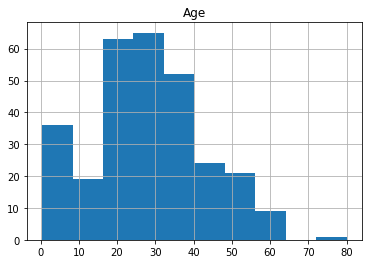

In [7]:
pass_data[['Age']].loc[pass_data.Survived == True].hist()
print("Выжившие")

Не выжившие


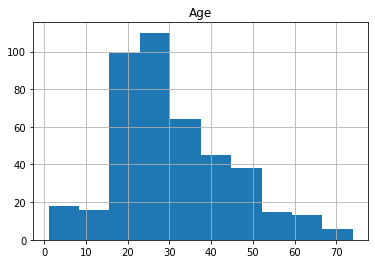

In [8]:
pass_data[['Age']].loc[pass_data.Survived == False].hist()
print("Не выжившие")

Вывод: Больше всего выживших людей в возрасте от 20 до 40 лет. Число погибших в возрасте от 40 до 70 лет, примерно больше в 2 раза, чем выживших. Больше всех сметрей в возрасте от 15-30 лет.

#### 9)Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

Выжившие-1 класс


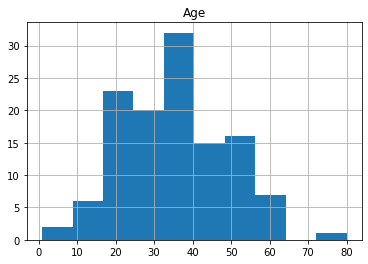

In [9]:
pass_data.query('Survived == 1 and Pclass == 1')[['Age']].hist()
print("Выжившие-1 класс")

Не выжившие-1 класс


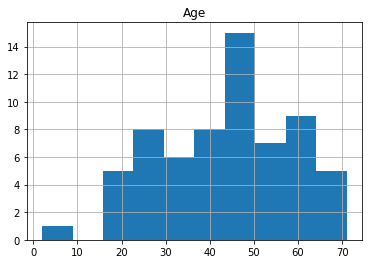

In [10]:
pass_data.query('Survived == 0 and Pclass == 1')[['Age']].hist()
print("Не выжившие-1 класс")

Вывод: Число пассажиров выживших в 1 классе  в возрасте от 0 до 60 лет больше, чем число погибших. В возрасте от 60 до 70 лет больше погибших ,чем выживших. Пик выживших 30-40 лет.

Выжившие-2 класс


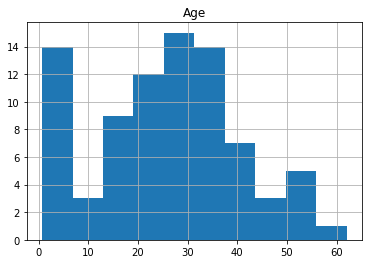

In [11]:
pass_data.query('Survived == 1 and Pclass == 2')[['Age']].hist()
print("Выжившие-2 класс")

Не выжившие-2 класс


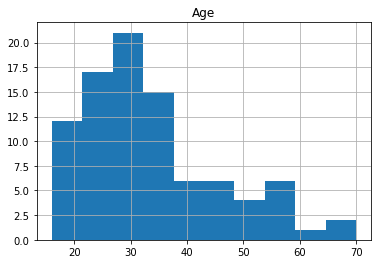

In [12]:
pass_data.query('Survived == 0 and Pclass == 2')[['Age']].hist()
print("Не выжившие-2 класс")

Вывод: Во 2 классе количество выживших меньше, чем погибших.

Выжившие-3 класс


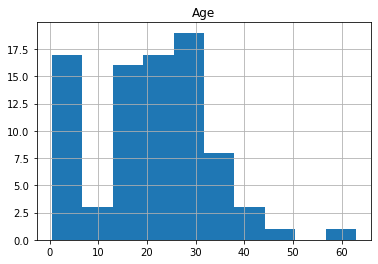

In [13]:
pass_data.query('Survived == 1 and Pclass == 3')[['Age']].hist()
print("Выжившие-3 класс")

Не выжившие-3 класс


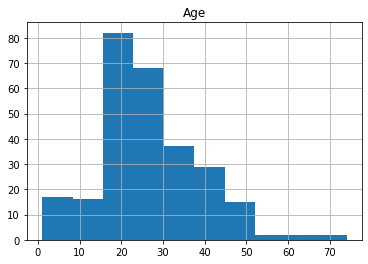

In [14]:
pass_data.query('Survived == 0 and Pclass == 3')[['Age']].hist()
print("Не выжившие-3 класс")

Вывод: Больше всего выжило в 3 классе в возрасте от 0 до 10 и от 13 до 30 лет. Не выжило больше всего в возрасте от 15 до 30 лет

#### 10)Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

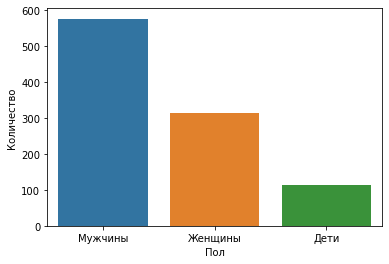

In [15]:
df = pd.DataFrame({
        "Количество":[
            len(pass_data.loc[pass_data.Sex == 'male']),
            len(pass_data.loc[pass_data.Sex == 'female']),
            len(pass_data.query('Age<18'))],
        "Пол":["Мужчины","Женщины","Дети" ]
})
sns.barplot(data=df, x="Пол", y="Количество" )